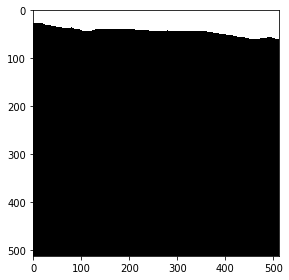

In [2]:
import os
import numpy as np
from skimage.io import imsave, imread, imshow
data_path=""
train_data_path = os.path.join(data_path, 'train')
img = imread(os.path.join(train_data_path, "1.tif"), as_gray=True)

img_mask0 = imread(os.path.join(train_data_path, "1_bckg_mask.tif"), as_gray=True)
imshow(img_mask0)



[  0 255]


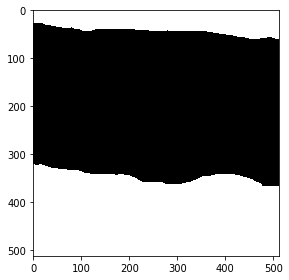

In [15]:
img_mask1 = imread(os.path.join(train_data_path, "1_epi_mask.tif"), as_gray=True)
imshow(img_mask1)
print(np.unique(img_mask1))

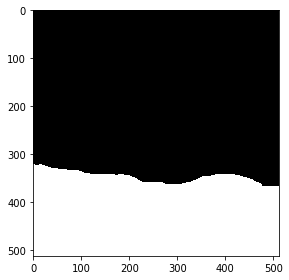

In [7]:
img_mask2 = imread(os.path.join(train_data_path, "1_dermi_mask.tif"), as_gray=True)
imshow(img_mask2)

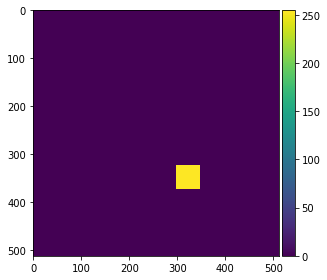

In [6]:
img_mask3 = imread(os.path.join(train_data_path, "1_nerve_mask.tif"), as_gray=True)
imshow(img_mask3)

(512, 512)
[  0  85 170 255]


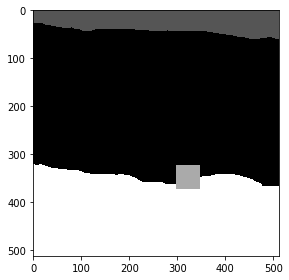

In [21]:
'''
0-BACKGROUND
85 - epidermis
170 - infiltrating nerve
255 - dermis
'''

img_mask=np.zeros_like(img_mask0)
print(img_mask.shape)

epi=np.where(img_mask1>0)
img_mask[epi]=85

derm = np.where(img_mask2>0)
img_mask[derm]=255

nerv = np.where(img_mask3>0)
img_mask[nerv]=170

print (np.unique(img_mask))
imshow(img_mask)


In [26]:
height, width = img.shape
print(np.unique(img_mask)/255)
mask=img_mask
thresh_indices=[0,1/3,2/3,1]

[0.         0.33333333 0.66666667 1.        ]


In [27]:
n=4
real_mask = np.zeros([mask.shape[0], mask.shape[1], n])
for class_ in range(n-1):
    real_mask[:,:,class_] = (mask[:,:] >= thresh_indices[class_]) * (mask[:,:] <  thresh_indices[class_+1])
real_mask[:,:,-1] = (mask[:,:] >= thresh_indices[-1])
real_mask = real_mask.astype(np.uint8)


In [28]:
print(real_mask.shape)


(512, 512, 4)
